In [182]:
from google.colab import drive

In [183]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from prophet import Prophet
from typing import Union

In [185]:
df = pd.read_csv('/content/drive/MyDrive/HAMOYE QUIZ/Time_series_analysis_and_forecast_DATASET.csv')

In [186]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [187]:
df.FullDate = pd.to_datetime(df.FullDate,yearfirst=True)

In [188]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [189]:
df_daily =  df.resample('D',on='FullDate').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


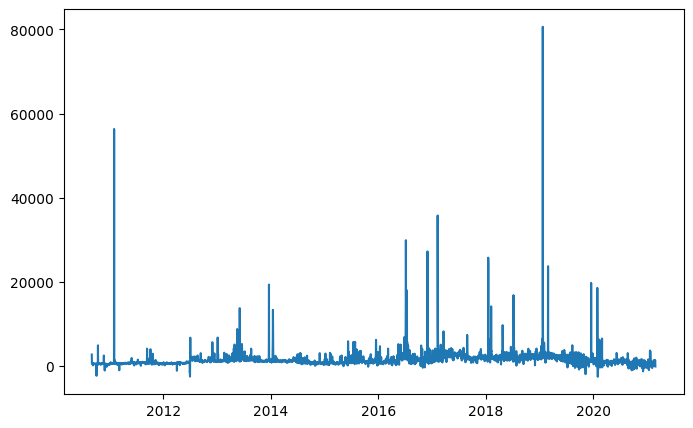

In [190]:
fig,ax = plt.subplots(figsize = (8,5))
ax.plot(df_daily.ElecPrice)

In [191]:
x = len(df_daily)
x

3834

In [192]:
from statsmodels.tsa.stattools import adfuller

In [193]:
def stationary_check (df:Union[pd.DataFrame,pd.Series]):
  adf_result = adfuller(df)
  return adf_result


In [194]:
print('sysload p value : {}'.format(stationary_check(df_daily.SysLoad)[1]))
print('gasprice p value : {}'.format(stationary_check(df_daily.GasPrice)[1]))

sysload p value : 0.004253725504574063
gasprice p value : 0.04502721288462552


In [195]:
print('adfuller result : {}'.format(stationary_check(df_daily.GasPrice)))
print('adfuller result : {}'.format(stationary_check(df_daily.ElecPrice)))

adfuller result : (-2.902766697165179, 0.04502721288462552, 27, 3806, {'1%': -3.4320693157877544, '5%': -2.8622996992165364, '10%': -2.5671743978048323}, 32857.5394299048)
adfuller result : (-8.269053866873799, 4.848817773711772e-13, 20, 3813, {'1%': -3.432066157296446, '5%': -2.8622983040036005, '10%': -2.5671736550459663}, 69130.36360776308)


In [196]:
df_daily.reset_index(inplace=True)

In [197]:
df_daily_ElecPrice = df_daily[['FullDate','ElecPrice']]

In [198]:
df_daily_ElecPrice.rename(columns={'FullDate':'ds','ElecPrice':'y'},inplace=True)

<ipython-input-198-4fdc0555983b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_ElecPrice.rename(columns={'FullDate':'ds','ElecPrice':'y'},inplace=True)


In [199]:
df_daily_ElecPrice

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [200]:
model = Prophet()


In [201]:
train = df_daily_ElecPrice[:2757]
test = df_daily_ElecPrice[2757:]

In [202]:
len(test)

1077

In [203]:
x-2757

1077

In [204]:
model.fit(train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l1too1r/jc3x10yn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l1too1r/a_6mg4d1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53977', 'data', 'file=/tmp/tmp_l1too1r/jc3x10yn.json', 'init=/tmp/tmp_l1too1r/a_6mg4d1.json', 'output', 'file=/tmp/tmp_l1too1r/prophet_model6lkqklb_/prophet_model-20230404142619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [205]:
future = model.make_future_dataframe(x-2757)

In [206]:
future

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [207]:
forecast = model.predict(future)

In [208]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,848.493082,-1572.420360,3209.059804,848.493082,848.493082,144.175973,144.175973,144.175973,159.365206,159.365206,159.365206,-15.189233,-15.189233,-15.189233,0.0,0.0,0.0,992.669055
1,2010-09-02,848.446915,-1146.385322,3390.267597,848.446915,848.446915,224.475854,224.475854,224.475854,257.121966,257.121966,257.121966,-32.646112,-32.646112,-32.646112,0.0,0.0,0.0,1072.922769
2,2010-09-03,848.400748,-1663.373426,3242.537899,848.400748,848.400748,-0.563464,-0.563464,-0.563464,50.276706,50.276706,50.276706,-50.840171,-50.840171,-50.840171,0.0,0.0,0.0,847.837284
3,2010-09-04,848.354581,-1863.668872,2865.864828,848.354581,848.354581,-340.891270,-340.891270,-340.891270,-271.455065,-271.455065,-271.455065,-69.436205,-69.436205,-69.436205,0.0,0.0,0.0,507.463311
4,2010-09-05,848.308415,-1996.279482,2913.204505,848.308415,848.308415,-430.869622,-430.869622,-430.869622,-342.742141,-342.742141,-342.742141,-88.127481,-88.127481,-88.127481,0.0,0.0,0.0,417.438793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,3547.178142,663.048682,6454.895326,2031.953019,5401.709666,-90.606008,-90.606008,-90.606008,159.365206,159.365206,159.365206,-249.971214,-249.971214,-249.971214,0.0,0.0,0.0,3456.572134
3830,2021-02-25,3547.979793,468.547141,6505.626739,2031.104574,5403.325561,-24.513730,-24.513730,-24.513730,257.121966,257.121966,257.121966,-281.635697,-281.635697,-281.635697,0.0,0.0,0.0,3523.466063
3831,2021-02-26,3548.781445,310.274526,6283.728406,2029.803993,5404.941457,-258.479739,-258.479739,-258.479739,50.276706,50.276706,50.276706,-308.756445,-308.756445,-308.756445,0.0,0.0,0.0,3290.301706
3832,2021-02-27,3549.583096,-9.515236,5941.366295,2029.172882,5406.557352,-602.594288,-602.594288,-602.594288,-271.455065,-271.455065,-271.455065,-331.139223,-331.139223,-331.139223,0.0,0.0,0.0,2946.988808


In [209]:
test['yhat'] = forecast['yhat'][2757:].values

<ipython-input-209-10b60a2aeaf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yhat'] = forecast['yhat'][2757:].values


In [210]:
test

,ds,y,yhat
2757,2018-03-20,1833.000,2532.525776
2758,2018-03-21,1730.490,2685.859986
2759,2018-03-22,2260.550,2784.887009
2760,2018-03-23,2138.760,2577.041051
2761,2018-03-24,1721.700,2252.279594
...,...,...,...
3829,2021-02-24,634.770,3456.572134
3830,2021-02-25,577.515,3523.466063
3831,2021-02-26,1445.495,3290.301706
3832,2021-02-27,488.980,2946.988808


In [211]:
def mape(y_actual,y_predict):
  mape_result = np.mean(np.abs((y_actual-y_predict)/y_actual))*100
  return mape_result

In [212]:
mape(test.y.values,test.yhat.values)

546.4558274693029

In [213]:
test.y -test.yhat

2757    -699.525776
2758    -955.369986
2759    -524.337009
2760    -438.281051
2761    -530.579594
           ...     
3829   -2821.802134
3830   -2945.951063
3831   -1844.806706
3832   -2458.008808
3833   -2957.944864
Length: 1077, dtype: float64

In [214]:
test['month_name'] = test.ds.dt.month_name()

<ipython-input-214-cde5780a349e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month_name'] = test.ds.dt.month_name()


In [215]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [216]:
np.sqrt(mean_squared_error(test.y,test.yhat))

3211.82494866135

In [217]:
mean_absolute_percentage_error(test.y,test.yhat)

5.464558274693029

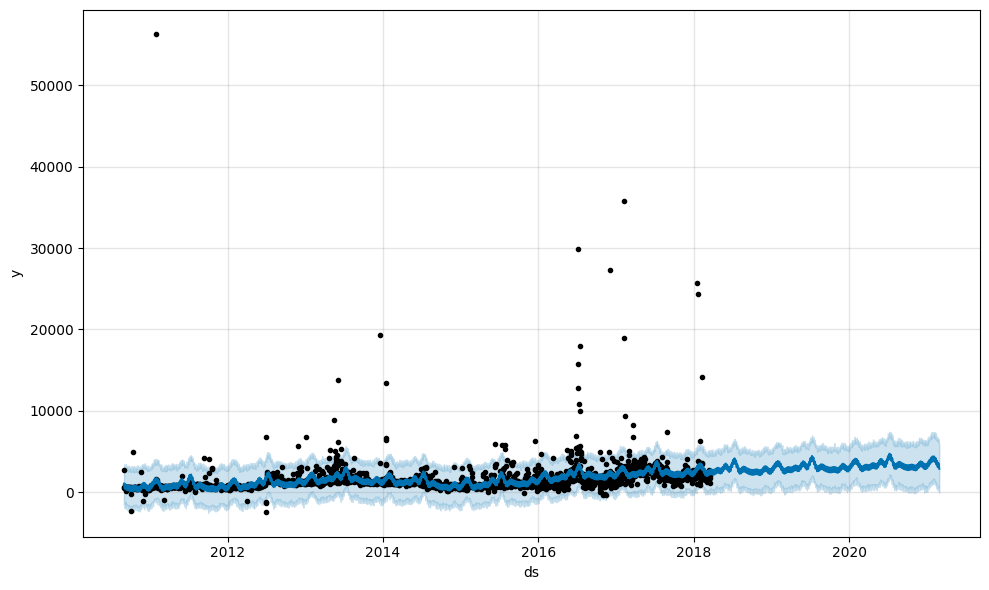

In [218]:
model.plot(forecast)
plt.show()

In [223]:
df_daily.rename(columns = {'FullDate':'ds','ElecPrice':'y',	'SysLoad':'add1',	'Tmax':'add2',	'GasPrice':'add3'},inplace=True)


In [224]:
df_daily

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [231]:
train1 = df_daily[:2757]
test1 = df_daily[2757:]

In [233]:
model1 = Prophet()

In [234]:
model1.add_regressor('add1',standardize=False)
model1.add_regressor('add2',standardize=False)
model1.add_regressor('add3',standardize=False)

In [235]:
model1.fit(train1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l1too1r/w42nh16l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l1too1r/sfavy_1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66910', 'data', 'file=/tmp/tmp_l1too1r/w42nh16l.json', 'init=/tmp/tmp_l1too1r/sfavy_1t.json', 'output', 'file=/tmp/tmp_l1too1r/prophet_modelnkvvm5v2/prophet_model-20230404144704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:47:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
ERROR:cmdstanpy:Chain [1] error: error duri

In [236]:
test2 = test1[['ds','add2','add1','add3']]
test2

,ds,add2,add1,add3
2757,2018-03-20,540.0,7696.91130,201.5880
2758,2018-03-21,571.2,4658.05865,203.2560
2759,2018-03-22,722.4,19161.78525,203.2560
2760,2018-03-23,811.2,18090.43435,198.6456
2761,2018-03-24,832.8,3763.53865,180.2160
...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000
3830,2021-02-25,518.4,4539.07855,130.5048
3831,2021-02-26,547.2,9517.02430,130.1808
3832,2021-02-27,564.0,4932.88015,130.0800


In [237]:
forecast = model1.predict(test2)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,-1259.924315,-264.767045,4179.369913,-1259.924315,-1259.924315,434.059920,434.059920,434.059920,-0.045579,...,-84.979820,-84.979820,-84.979820,-44.410272,-44.410272,-44.410272,0.0,0.0,0.0,1968.967779
1,2018-03-21,-1259.265765,-322.168595,4264.695075,-1259.265765,-1259.265765,262.686743,262.686743,262.686743,-0.048213,...,42.623815,42.623815,42.623815,-35.282382,-35.282382,-35.282382,0.0,0.0,0.0,1959.178319
2,2018-03-22,-1258.607214,471.573878,5129.378886,-1258.607214,-1258.607214,1080.610473,1080.610473,1080.610473,-0.060975,...,145.142654,145.142654,145.142654,-30.408713,-30.408713,-30.408713,0.0,0.0,0.0,2885.140346
3,2018-03-23,-1257.948664,294.738411,4999.387390,-1257.948664,-1257.948664,1020.192668,1020.192668,1020.192668,-0.068470,...,-44.755234,-44.755234,-44.755234,-29.643744,-29.643744,-29.643744,0.0,0.0,0.0,2569.361475
4,2018-03-24,-1257.290113,-765.649647,3599.566752,-1257.290113,-1257.290113,212.241147,212.241147,212.241147,-0.070293,...,-116.982548,-116.982548,-116.982548,-32.732691,-32.732691,-32.732691,0.0,0.0,0.0,1419.407689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,-553.958158,-1453.784182,3304.308578,-1580.003902,419.336319,-86.028963,-86.028963,-86.028963,-0.045377,...,42.623815,42.623815,42.623815,-439.303226,-439.303226,-439.303226,0.0,0.0,0.0,912.916038
1073,2021-02-25,-553.299607,-1234.030119,3778.740741,-1582.170441,420.401662,255.976975,255.976975,255.976975,-0.043756,...,145.142654,145.142654,145.142654,-465.697005,-465.697005,-465.697005,0.0,0.0,0.0,1275.202812
1074,2021-02-26,-552.641057,-1011.302273,3759.706615,-1584.336980,421.467005,536.703444,536.703444,536.703444,-0.046187,...,-44.755234,-44.755234,-44.755234,-486.297857,-486.297857,-486.297857,0.0,0.0,0.0,1341.386664
1075,2021-02-27,-551.982506,-1532.859123,3241.508555,-1586.503519,422.976892,278.185038,278.185038,278.185038,-0.047605,...,-116.982548,-116.982548,-116.982548,-500.871624,-500.871624,-500.871624,0.0,0.0,0.0,995.262088


In [242]:
test1['yhat'] = forecast['yhat'].values

<ipython-input-242-b40c3857da27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['yhat'] = forecast['yhat'].values


In [243]:
test1

,ds,add2,add1,add3,y,yhat
2757,2018-03-20,540.0,7696.91130,201.5880,1833.000,1968.967779
2758,2018-03-21,571.2,4658.05865,203.2560,1730.490,1959.178319
2759,2018-03-22,722.4,19161.78525,203.2560,2260.550,2885.140346
2760,2018-03-23,811.2,18090.43435,198.6456,2138.760,2569.361475
2761,2018-03-24,832.8,3763.53865,180.2160,1721.700,1419.407689
...,...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770,912.916038
3830,2021-02-25,518.4,4539.07855,130.5048,577.515,1275.202812
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495,1341.386664
3832,2021-02-27,564.0,4932.88015,130.0800,488.980,995.262088


In [244]:
mean_absolute_percentage_error(test1.y,test1.yhat)

2.2582366090966404

In [245]:
np.sqrt(mean_squared_error(test1.y,test1.yhat))

2701.174518072072

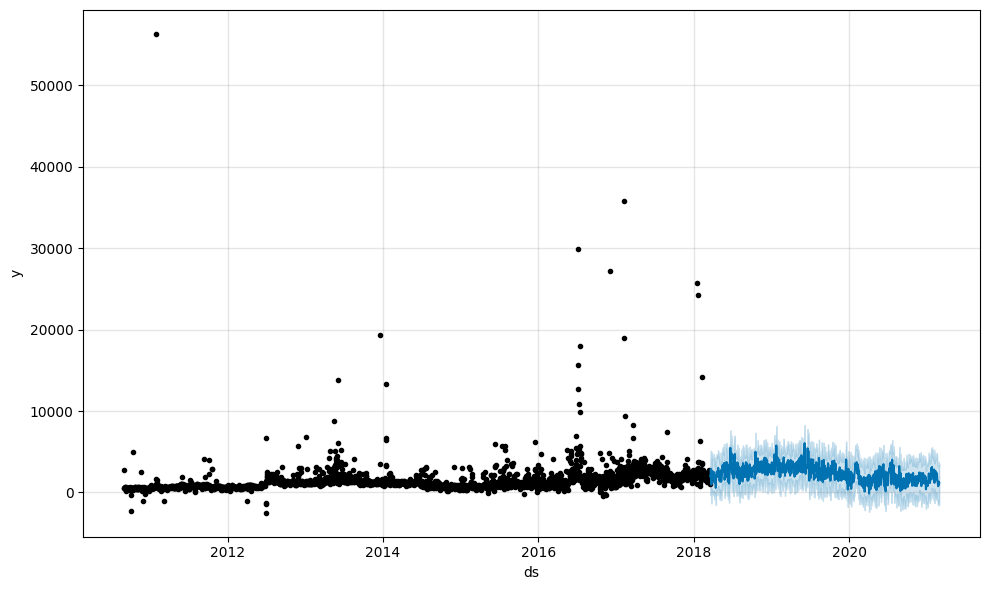

In [251]:
model1.plot(forecast)

plt.show()